In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

def get_relay_curve(In=1, order=4, C=1):
    def relay_curve(I, *ks):
        t = 0
        for order, k in enumerate(ks):
            t += k*np.log10((I/In)-C)**order
        return 10**t
    return relay_curve


In [9]:
curve_u = np.genfromtxt('curve_u.csv', delimiter=',', dtype=float)
i_u = np.round(curve_u[:, 0],2)
t_u = np.round(curve_u[:, 1],2)
display(i_u, t_u)

curve_l = np.genfromtxt('curve_l.csv', delimiter=',', dtype=float)
i_l = np.round(curve_l[:, 0],2)
t_l = np.round(curve_l[:, 1],2)
display(i_l, t_l)

array([1.2 , 1.2 , 1.36, 1.68, 2.19, 3.15, 4.87, 7.13])

array([7.2000e+03, 8.1160e+02, 1.6226e+02, 5.0480e+01, 1.9810e+01,
       8.3000e+00, 3.9400e+00, 2.3600e+00])

array([1.05, 1.05, 1.09, 1.27, 1.59, 2.08, 2.89, 4.35, 7.11])

array([7.2000e+03, 7.0761e+02, 2.3278e+02, 7.7160e+01, 2.7020e+01,
       1.0660e+01, 4.5400e+00, 1.9500e+00, 8.7000e-01])

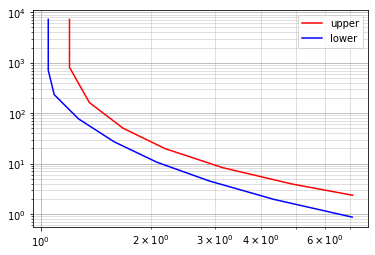

In [10]:
xdata = np.array(i_u)
ydata = np.array(t_u)
plt.plot(xdata, ydata, 'r-', label='upper')

xdata = np.array(i_l)
ydata = np.array(t_l)
plt.plot(xdata, ydata, 'b-', label='lower')

plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()

[1.20682, -1.3267, 0.10981, 0.22282, -0.13182, -0.03749, 0.04422]

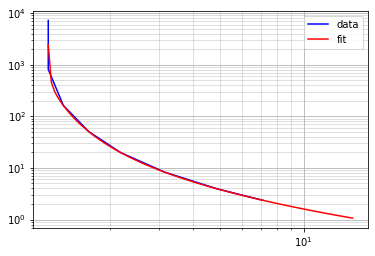

In [11]:
# Curve fitting upper

In = 1.18
order=6
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_u)
ydata = np.array(t_u)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 15, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))

[1.03016, -1.49455, -0.09062, 0.30958, -0.02977, -0.08119]

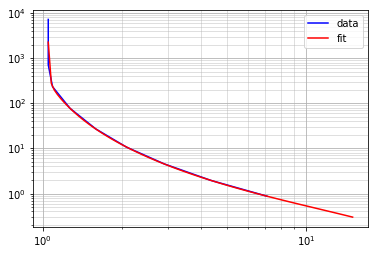

In [20]:
# Curve fitting lower

In=1.04
order=5
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_l)
ydata = np.array(t_l)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 15, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))